# Table of Contents
* [Data Preprocessing](#data-preprocessing)
    * [Data Loading](#data-loading)
    * [Filter Out High-value Customers](#filter-customers)
    * [Define Target Variable (Churn)](#define-churn)
    * [Filter Out Single Unique Values](#filter-single)
    * [Missing Values](#missing-values)
    * [Derive Features](#derive-features)
    * [Filter Out Highly Related Features](#filter-related)
    * [Prepare Train and Test Data](#train-test)
        * [Split Train and Test](#split)
        * [Feature Selection](#feature-selection)
        * [Resample](#resample)
        * [Scale](#scale)
* [Logistic Regression](#logistic-regression)

# Data Proprocessing <a class="anchor" id="data-preprocessing"></a> 

## Data Loading <a class="anchor" id="data-loading"></a> 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set(style="ticks")
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# pd.set_option('display.max_colwidth', -1)

rdn_seed = 42

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
telecom.rename(
    columns={
        'jun_vbc_3g': 'vbc_3g_6',
        'jul_vbc_3g': 'vbc_3g_7',
        'aug_vbc_3g': 'vbc_3g_8',
        'sep_vbc_3g': 'vbc_3g_9',
    },
    inplace=True,)

In [6]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

## Filter Out High Value Customers <a class="anchor" id="filter-customers"></a>

Normally, the revenue of a business is majorly from high-value customers. Let's check whether this telecom business satisfies this rule.

We have two kinds of recharge data:
1. recharge for Internet data usage = `total_rech_data` * `av_rech_amt_data`
2. recharge for calling = `total_rech_amt`

Calculate total charge amount as `total_amt`. Note `_6`, `_7` and `_8` means June, July, and August.

In [7]:
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']

In [8]:
telecom['total_amt_6'] = telecom[['total_rech_amt_6','total_data_rech_amt_6']].sum(axis=1)
telecom['total_amt_7'] = telecom[['total_rech_amt_7','total_data_rech_amt_7']].sum(axis=1)
telecom['total_amt_8'] = telecom[['total_rech_amt_8','total_data_rech_amt_8']].sum(axis=1)

High-value Customers Analysis: To see accumulative percentage of revenue from customers.

Text(0.5, 0.98, 'Revenue contribution of customers')

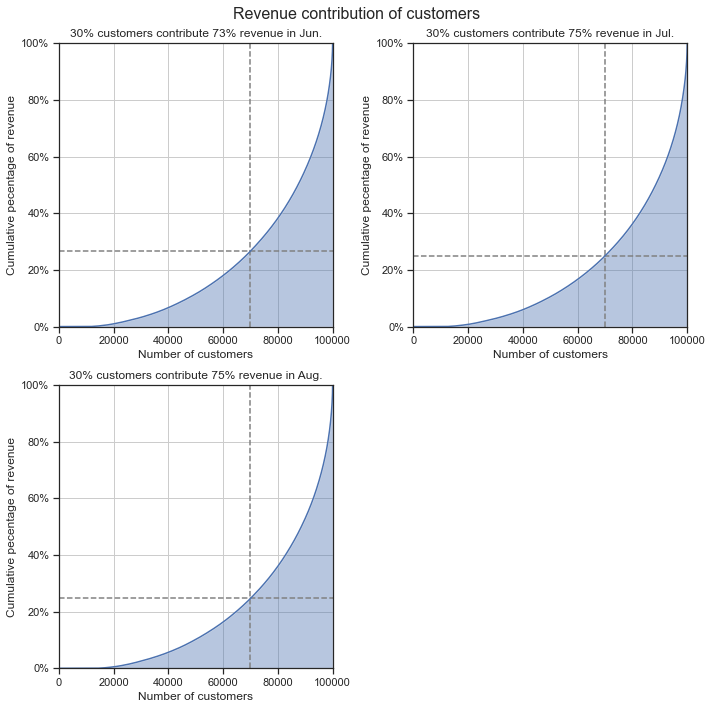

In [9]:
total_amt_cols = ['total_amt_6', 'total_amt_7', 'total_amt_8']
month_labels = ['Jun.', 'Jul.', 'Aug.']

fig = plt.figure(figsize=(10, 10), tight_layout=True)

for idx in range(len(total_amt_cols)):
    rev = telecom[total_amt_cols[idx]].sort_values().reset_index(drop=True)
    rev_pct = rev.cumsum()
    rev_pct /= rev_pct.iloc[-1]
    pct = rev_pct.quantile(0.7)
    
    ax = fig.add_subplot(2, 2, idx + 1)
    ax.plot(rev_pct)
    ax.fill_between(rev_pct.index, rev_pct.values, alpha=0.4)
    ax.vlines(x=70000, ymax=1, ymin=0, colors="gray", linestyles="--")
    ax.hlines(y=pct, xmax=100000, xmin=0, colors="gray", linestyles="--")

    ax.set_title('30% customers contribute {:.0%} revenue in {}'.format(1 - pct, month_labels[idx]))
    ax.set_ylabel('Cumulative pecentage of revenue')
    ax.set_xlabel('Number of customers')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 100000)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.grid()

fig.suptitle('Revenue contribution of customers', fontsize=16)

30% of customers contribute about 75% of the renvnue. Therefore, we should filter out these high-value customers and train our model based on them.

In [10]:
highvalue = telecom[(telecom['total_amt_6'] > telecom['total_amt_6'].quantile(0.7)) |
                    (telecom['total_amt_7'] > telecom['total_amt_7'].quantile(0.7)) |
                    (telecom['total_amt_8'] > telecom['total_amt_8'].quantile(0.7))].copy()
highvalue.shape

(46145, 232)

平均每月费用

In [11]:
# highvalue[total_amt_cols].mean().mean()

In [12]:
# sns.displot(highvalue['aon'] / 30)

In [13]:
# (highvalue['aon']/30).mean()

In [14]:
# (highvalue['aon']/30).median()

## Define Target Variable (Churn) <a class="anchor" id="define-churn"></a>

We have data from June to September.

**Definition of churn**: The churn customers don't have incoming and outgoing calls, and don't use the Internet data in September.

We have four features related to customers usage of calls and the Internet.
1. total_ic_mou_9: total incoming call time in minutes in September
2. total_og_mou_9: total outgoing call time in minutes in September
3. vol_2g_mb_9: total 2G data in MB in September
4. vol_3g_mb_9: total 3G data in MB in September

In [15]:
highvalue[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.0
1,188.04,72.11,0.0,0.0
3,305.38,362.54,0.0,0.0
6,2572.49,65.91,0.0,0.0
7,0.00,0.00,0.0,0.0


In [16]:
highvalue['churn_flag'] = np.where(
    (highvalue['total_ic_mou_9'] == 0.00) & (highvalue['total_og_mou_9'] == 0.00)
    & (highvalue['vol_2g_mb_9'] == 0.00) & (highvalue['vol_3g_mb_9'] == 0.00),
    1, 0)
highvalue['churn_flag'].value_counts()

0    41940
1     4205
Name: churn_flag, dtype: int64

In [17]:
churn_count = highvalue['churn_flag'].value_counts()
print('{} customers stayed (label 1) \n{} customers churned (label 0)'.format(churn_count.iloc[0], churn_count.iloc[1]))

41940 customers stayed (label 1) 
4205 customers churned (label 0)


The percentage of churn (label 1) and stayed (label 0) customers (Unbalanced dataset).

In [18]:
highvalue['churn_flag'].value_counts() * 100/highvalue.shape[0]

0    90.88742
1     9.11258
Name: churn_flag, dtype: float64

filter out data in September because we only use data from pervious months to predict.

In [19]:
highvalue = highvalue.drop(highvalue.filter(regex='_9|sep', axis = 1).columns, axis=1)
highvalue.shape

(46145, 178)

## Filter Out Useless Features: Single Unique Values & Mobile Number <a class="anchor" id="filter-single"></a>

In [20]:
unique_stats = highvalue.nunique().to_frame().reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
unique_stats[unique_stats['nunique'] == 1]

,feature,nunique
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
47,std_og_t2c_mou_6,1
48,std_og_t2c_mou_7,1
49,std_og_t2c_mou_8,1


In [21]:
single_cols = unique_stats.loc[unique_stats['nunique'] == 1, 'feature']
highvalue.drop(columns=single_cols, inplace=True)
highvalue.shape

(46145, 165)

In [22]:
highvalue.drop(columns=['mobile_number'], inplace=True)

## Missing Values <a class="anchor" id="missing-values"></a>

The missing value percentage for each feature

In [23]:
round((highvalue.isna().sum()*100 / highvalue.shape[0]), 2).sort_values(ascending=False)

arpu_2g_6                   55.20
date_of_last_rech_data_6    55.20
count_rech_3g_6             55.20
night_pck_user_6            55.20
count_rech_2g_6             55.20
max_rech_data_6             55.20
total_rech_data_6           55.20
av_rech_amt_data_6          55.20
fb_user_6                   55.20
total_data_rech_amt_6       55.20
arpu_3g_6                   55.20
date_of_last_rech_data_7    53.86
max_rech_data_7             53.86
count_rech_3g_7             53.86
av_rech_amt_data_7          53.86
count_rech_2g_7             53.86
total_data_rech_amt_7       53.86
arpu_2g_7                   53.86
total_rech_data_7           53.86
fb_user_7                   53.86
arpu_3g_7                   53.86
night_pck_user_7            53.86
arpu_3g_8                   52.40
arpu_2g_8                   52.40
night_pck_user_8            52.40
av_rech_amt_data_8          52.40
max_rech_data_8             52.40
count_rech_3g_8             52.40
count_rech_2g_8             52.40
total_rech_dat

### Methodologies

There are two possibilities why this feature have missing values:
1. **Customers have no transaction**, so we need to assign 0 to this feature 
2. **Our data collection system fail to collect the data**, so we can use mean, median or EM algorithm to fill it

### 1. Missing because customers have no transaction

Let's look at `arpu_2g_6`, which has highest missing rate. This feature means average revenue per user for 2g network data usage in June.

Let's check what is the actual reason for missing.

Firstly, get the data-recharge-related columns

In [24]:
rech_data_cols = ['date_of_last_rech_data', 'total_rech_data', 'max_rech_data', 
                  'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 
                  'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 
                  'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 
                  'sachet_3g', 'fb_user']

rech_cols = ['total_rech_num', 'total_rech_amt', 'max_rech_amt',
             'date_of_last_rech', 'last_day_rech_amt', 'date_of_last_rech_data',
             'total_rech_data', 'max_rech_data', 'count_rech_2g',
             'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb',
             'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g',
             'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user']

In [25]:
highvalue[highvalue['arpu_2g_6'].isna()][list(map(lambda ele : ele + '_6', rech_data_cols))].nunique()

date_of_last_rech_data_6    0
total_rech_data_6           0
max_rech_data_6             0
count_rech_2g_6             0
count_rech_3g_6             0
av_rech_amt_data_6          0
vol_2g_mb_6                 1
vol_3g_mb_6                 1
arpu_3g_6                   0
arpu_2g_6                   0
night_pck_user_6            0
monthly_2g_6                1
sachet_2g_6                 1
monthly_3g_6                1
sachet_3g_6                 1
fb_user_6                   0
dtype: int64

Observation 1: For sub-data where `arpu_2g_6` is NaN in the rows, the `arpu_2g_6` related columns only have 0 or 1 kind of values.

In [26]:
highvalue[highvalue['arpu_2g_6'].isna()][list(map(lambda ele : ele + '_6', rech_data_cols))].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN


Observation 2: For sub-data where `arpu_2g_6` is NaN in the rows, the `arpu_2g_6` related columns have value NaN or 0.0

Conclusion from Observation 1 & 2:
For sub-data where `arpu_2g_6` is NaN in the rows, all `arpu_2g_6` related data have value NaN or 0, **which means customers don't have transaction records for data usage.**

So fill all these columns with value 0.

In [27]:
fill_cols = ['fb_user_6', 'arpu_3g_6', 'max_rech_data_6', 'arpu_2g_6', 
             'total_rech_data_6', 'total_data_rech_amt_6', 'av_rech_amt_data_6', 
             'night_pck_user_6', 'count_rech_2g_6', 'date_of_last_rech_data_6',
             'count_rech_3g_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

fb_user_6                   0
arpu_3g_6                   0
max_rech_data_6             0
arpu_2g_6                   0
total_rech_data_6           0
total_data_rech_amt_6       0
av_rech_amt_data_6          0
night_pck_user_6            0
count_rech_2g_6             0
date_of_last_rech_data_6    0
count_rech_3g_6             0
dtype: int64

Similarly, we can use this method to fill other columns with same missing reason (no transaction records)

In [28]:
fill_cols = ['av_rech_amt_data_8', 'arpu_2g_8', 'date_of_last_rech_data_8',
             'total_data_rech_amt_8', 'total_rech_data_8', 'arpu_3g_8',
             'max_rech_data_8', 'night_pck_user_8', 'count_rech_2g_8', 
             'count_rech_3g_8', 'fb_user_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [29]:
fill_cols = ['total_rech_data_7', 'max_rech_data_7', 'date_of_last_rech_data_7', 
             'night_pck_user_7', 'fb_user_7', 'count_rech_3g_7', 'arpu_2g_7', 
             'total_data_rech_amt_7', 'av_rech_amt_data_7', 'arpu_3g_7',
             'count_rech_2g_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [30]:
fill_cols = ['loc_og_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2f_mou_8', 
             'isd_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
             'ic_others_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
             'std_og_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8',
             'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'og_others_8',
             'loc_ic_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2m_mou_8',
             'loc_ic_t2m_mou_8', 'offnet_mou_8', 'spl_ic_mou_8',
             'roam_og_mou_8', 'std_ic_t2m_mou_8', 'onnet_mou_8',
             'std_ic_mou_8', 'roam_ic_mou_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [31]:
fill_cols = ['std_ic_mou_7', 'loc_og_t2t_mou_7', 'std_og_t2f_mou_7', 
             'isd_og_mou_7', 'std_og_t2m_mou_7', 'spl_og_mou_7',
             'std_og_t2t_mou_7', 'og_others_7', 'loc_og_mou_7',
             'loc_ic_t2t_mou_7', 'loc_og_t2c_mou_7', 'loc_ic_t2m_mou_7',
             'loc_og_t2f_mou_7', 'loc_ic_t2f_mou_7', 'loc_og_t2m_mou_7',
             'loc_ic_mou_7', 'std_og_mou_7', 'onnet_mou_7', 
             'roam_og_mou_7', 'std_ic_t2m_mou_7', 'spl_ic_mou_7', 
             'roam_ic_mou_7', 'ic_others_7', 'std_ic_t2f_mou_7', 
             'offnet_mou_7', 'std_ic_t2t_mou_7', 'isd_ic_mou_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [32]:
fill_cols = ['std_ic_t2t_mou_6', 'std_ic_mou_6', 'isd_og_mou_6', 
             'spl_og_mou_6', 'isd_ic_mou_6', 'loc_ic_t2t_mou_6',
             'og_others_6', 'std_ic_t2f_mou_6', 'ic_others_6',
             'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2m_mou_6',
             'std_og_mou_6', 'loc_ic_mou_6', 'spl_ic_mou_6',
             'roam_ic_mou_6', 'onnet_mou_6', 'loc_og_t2t_mou_6', 
             'loc_og_t2f_mou_6', 'roam_og_mou_6', 'loc_og_t2c_mou_6', 
             'loc_og_mou_6', 'offnet_mou_6', 'loc_og_t2m_mou_6', 
             'std_og_t2t_mou_6', 'std_og_t2f_mou_6', 'std_og_t2m_mou_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [33]:
highvalue['date_of_last_rech_7'].fillna(0, inplace=True)

In [34]:
highvalue['date_of_last_rech_6'].fillna(0, inplace=True)

### 2. Missing because data collection system fail to collect the data

This situation happened in `rech_8_cols`

In [35]:
rech_8_cols = highvalue.filter(regex='rech.*_8').columns

In [36]:
highvalue[highvalue['date_of_last_rech_8'].isna()][rech_8_cols].nunique()

total_rech_num_8            1
total_rech_amt_8            1
max_rech_amt_8              1
date_of_last_rech_8         0
last_day_rech_amt_8         1
date_of_last_rech_data_8    2
total_rech_data_8           2
max_rech_data_8             2
count_rech_2g_8             2
count_rech_3g_8             1
av_rech_amt_data_8          2
total_data_rech_amt_8       2
dtype: int64

Because `date_of_last_rech_data_8` has 2 different values, let's check how the data looks like when `date_of_last_rech_data_8` is not 0.

In [37]:
non_zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                             (highvalue['date_of_last_rech_data_8'] != 0), 
                             rech_8_cols]
non_zero_row

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,total_data_rech_amt_8
25540,0,0,0,NaN,0,8/12/2014,1.0,154.0,1.0,0.0,154.0,154.0


As we can seen above, there is only one row where `date_of_last_rech_data_8` is not 0.

We have over 30,000 rows of data thus we can simply drop this row.

In [38]:
highvalue.drop(non_zero_row.index, inplace=True)

In [39]:
zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                         (highvalue['date_of_last_rech_data_8'] == 0), 
                         rech_8_cols]
zero_row.nunique()

total_rech_num_8            1
total_rech_amt_8            1
max_rech_amt_8              1
date_of_last_rech_8         0
last_day_rech_amt_8         1
date_of_last_rech_data_8    1
total_rech_data_8           1
max_rech_data_8             1
count_rech_2g_8             1
count_rech_3g_8             1
av_rech_amt_data_8          1
total_data_rech_amt_8       1
dtype: int64

fill other `date_of_last_rech_8` as 0

In [40]:
highvalue['date_of_last_rech_8'].fillna(0, inplace=True)
highvalue['date_of_last_rech_8'].isna().sum()

0

### check whether we still have any missing values

In [41]:
highvalue.isna().values.any()

False

## Derived Features <a class="anchor" id="derive-features"></a>

### 1. Date features

Change date columns to `datetime` type

In [42]:
date_cols = highvalue.filter(regex='date').columns
for col in date_cols:
    highvalue[col] = pd.to_datetime(highvalue[col])
highvalue[date_cols].info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46144 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       46144 non-null  datetime64[ns]
 1   date_of_last_rech_7       46144 non-null  datetime64[ns]
 2   date_of_last_rech_8       46144 non-null  datetime64[ns]
 3   date_of_last_rech_data_6  46144 non-null  datetime64[ns]
 4   date_of_last_rech_data_7  46144 non-null  datetime64[ns]
 5   date_of_last_rech_data_8  46144 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 2.5 MB


Derive 2 features from date:
1. `dayofweek` of the date, e.g. monday, tuesday
2. `partofmonth` of the date, e.g. early (of the month), middle, late

In [43]:
def na_category(row, original_col, c_num, func):
    # if date equal to 1970-01-01, which means date is nan
    # then our customers didn't take any actions
    if row[original_col] == dt.datetime(1970, 1, 1):
        return c_num
    # otherwise, the action took at this time
    return func(row[original_col])

In [44]:
for col in date_cols:
    highvalue['dayofweek_' + col] = highvalue.apply(
        na_category, 
        axis=1, 
        args=(col, 7, lambda x : x.dayofweek,))
    highvalue['dayofweek_' + col] = highvalue['dayofweek_' + col].map({0: 'monday',
                                                                       1: 'tuesday',
                                                                       2: 'wednesday',
                                                                       3: 'thursday',
                                                                       4: 'friday',
                                                                       5: 'saturday',
                                                                       6: 'sunday',
                                                                       7: 'no_rech'})
    highvalue['partofmonth_' + col] = highvalue.apply(
        na_category,
        axis=1,
        args=(col, 3, lambda x : min(int((x.day - 1) / 10), 2),))
    highvalue['partofmonth_' + col] = highvalue['partofmonth_' + col].map({0: 'early',
                                                                           1: 'middle',
                                                                           2: 'late',
                                                                           3: 'no_rech'})

In [45]:
highvalue.filter(regex='(dayofweek|partofmonth)').head()

,dayofweek_date_of_last_rech_6,partofmonth_date_of_last_rech_6,dayofweek_date_of_last_rech_7,partofmonth_date_of_last_rech_7,dayofweek_date_of_last_rech_8,partofmonth_date_of_last_rech_8,dayofweek_date_of_last_rech_data_6,partofmonth_date_of_last_rech_data_6,dayofweek_date_of_last_rech_data_7,partofmonth_date_of_last_rech_data_7,dayofweek_date_of_last_rech_data_8,partofmonth_date_of_last_rech_data_8
0,saturday,late,wednesday,middle,friday,early,saturday,late,wednesday,middle,friday,early
1,sunday,late,thursday,late,thursday,late,no_rech,no_rech,friday,late,sunday,early
3,saturday,late,thursday,late,sunday,late,no_rech,no_rech,no_rech,no_rech,no_rech,no_rech
6,saturday,late,thursday,late,thursday,late,no_rech,no_rech,no_rech,no_rech,no_rech,no_rech
7,friday,late,friday,late,tuesday,late,no_rech,no_rech,no_rech,no_rech,no_rech,no_rech


one-hot encoding dummy variable

In [46]:
highvalue = pd.get_dummies(highvalue, columns=list(map(lambda x : 'dayofweek_' + x, date_cols)))
highvalue = pd.get_dummies(highvalue, columns=list(map(lambda x : 'partofmonth_' + x, date_cols)))

In [47]:
highvalue.filter(regex='(dayofweek|partofmonth)').head()

,dayofweek_date_of_last_rech_6_friday,dayofweek_date_of_last_rech_6_monday,dayofweek_date_of_last_rech_6_no_rech,dayofweek_date_of_last_rech_6_saturday,dayofweek_date_of_last_rech_6_sunday,dayofweek_date_of_last_rech_6_thursday,dayofweek_date_of_last_rech_6_tuesday,dayofweek_date_of_last_rech_6_wednesday,dayofweek_date_of_last_rech_7_friday,dayofweek_date_of_last_rech_7_monday,dayofweek_date_of_last_rech_7_no_rech,dayofweek_date_of_last_rech_7_saturday,dayofweek_date_of_last_rech_7_sunday,dayofweek_date_of_last_rech_7_thursday,dayofweek_date_of_last_rech_7_tuesday,dayofweek_date_of_last_rech_7_wednesday,dayofweek_date_of_last_rech_8_friday,dayofweek_date_of_last_rech_8_monday,dayofweek_date_of_last_rech_8_no_rech,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_8_thursday,dayofweek_date_of_last_rech_8_tuesday,dayofweek_date_of_last_rech_8_wednesday,dayofweek_date_of_last_rech_data_6_friday,dayofweek_date_of_last_rech_data_6_monday,dayofweek_date_of_last_rech_data_6_no_rech,dayofweek_date_of_last_rech_data_6_saturday,dayofweek_date_of_last_rech_data_6_sunday,dayofweek_date_of_last_rech_data_6_thursday,dayofweek_date_of_last_rech_data_6_tuesday,dayofweek_date_of_last_rech_data_6_wednesday,dayofweek_date_of_last_rech_data_7_friday,dayofweek_date_of_last_rech_data_7_monday,dayofweek_date_of_last_rech_data_7_no_rech,dayofweek_date_of_last_rech_data_7_saturday,dayofweek_date_of_last_rech_data_7_sunday,dayofweek_date_of_last_rech_data_7_thursday,dayofweek_date_of_last_rech_data_7_tuesday,dayofweek_date_of_last_rech_data_7_wednesday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_no_rech,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_6_early,partofmonth_date_of_last_rech_6_late,partofmonth_date_of_last_rech_6_middle,partofmonth_date_of_last_rech_6_no_rech,partofmonth_date_of_last_rech_7_early,partofmonth_date_of_last_rech_7_late,partofmonth_date_of_last_rech_7_middle,partofmonth_date_of_last_rech_7_no_rech,partofmonth_date_of_last_rech_8_early,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_8_middle,partofmonth_date_of_last_rech_8_no_rech,partofmonth_date_of_last_rech_data_6_early,partofmonth_date_of_last_rech_data_6_late,partofmonth_date_of_last_rech_data_6_middle,partofmonth_date_of_last_rech_data_6_no_rech,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_7_no_rech,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_middle,partofmonth_date_of_last_rech_data_8_no_rech
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1


drop original date cols

In [48]:
highvalue.drop(date_cols, axis=1, inplace=True)

### 2. Month-to-month change features

These features are calculated by the data from the last month and the current month. Basically, it's xxx_lastmonth / xxx_thismonth. 

Take `arpu` (Average Revenue Per User) for example:

$$
arpu\_7over6 = \frac{arpu\_7}{arpu\_6}
$$

However, **we may have denominator as 0 or negative values**. So we slightly change the formula:

$$
arpu\_7over6 = \frac{arpu\_7 + (-1)^{1\{arpu\_7 < 0\}}}{arpu\_6 + (-1)^{1\{arpu\_6 < 0\}}}
$$

Note that $1\{arpu\_7 < 0\}$ equals 1 if `arpu_7` < 0 otherwise it equals 0.

Now, to define a python function for this formula

In [49]:
def gen_over_cols(cols):
    for col in set(map(lambda x : x[:-2], cols)):
        adjust_6 = highvalue[col + '_6'].apply(lambda x : x + (1 if x >= 0 else -1))
        adjust_7 = highvalue[col + '_7'].apply(lambda x : x + (1 if x >= 0 else -1))
        adjust_8 = highvalue[col + '_8'].apply(lambda x : x + (1 if x >= 0 else -1))
        
        highvalue[col + '_7over6'] = (adjust_7 / adjust_6)
        highvalue[col + '_8over7'] = (adjust_8 / adjust_7)

Now let's derive month-to-month change data for usage and recharge columns

In [50]:
mou_cols = highvalue.filter(regex='mou').columns
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [51]:
gen_over_cols(mou_cols)

highvalue[highvalue.filter(regex='mou.*(7over6|8over7)').columns].head()

,std_ic_t2m_mou_7over6,std_ic_t2m_mou_8over7,std_og_t2t_mou_7over6,std_og_t2t_mou_8over7,isd_og_mou_7over6,isd_og_mou_8over7,loc_og_t2t_mou_7over6,loc_og_t2t_mou_8over7,loc_og_t2c_mou_7over6,loc_og_t2c_mou_8over7,std_ic_t2t_mou_7over6,std_ic_t2t_mou_8over7,roam_ic_mou_7over6,roam_ic_mou_8over7,std_og_t2f_mou_7over6,std_og_t2f_mou_8over7,spl_og_mou_7over6,spl_og_mou_8over7,offnet_mou_7over6,offnet_mou_8over7,roam_og_mou_7over6,roam_og_mou_8over7,loc_og_t2f_mou_7over6,loc_og_t2f_mou_8over7,std_ic_t2f_mou_7over6,std_ic_t2f_mou_8over7,onnet_mou_7over6,onnet_mou_8over7,spl_ic_mou_7over6,spl_ic_mou_8over7,loc_ic_t2m_mou_7over6,loc_ic_t2m_mou_8over7,std_ic_mou_7over6,std_ic_mou_8over7,std_og_t2m_mou_7over6,std_og_t2m_mou_8over7,total_og_mou_7over6,total_og_mou_8over7,total_ic_mou_7over6,total_ic_mou_8over7,loc_og_mou_7over6,loc_og_mou_8over7,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_8over7,loc_og_t2m_mou_7over6,loc_og_t2m_mou_8over7,std_og_mou_7over6,std_og_mou_8over7,loc_ic_t2f_mou_7over6,loc_ic_t2f_mou_8over7,loc_ic_mou_7over6,loc_ic_mou_8over7,isd_ic_mou_7over6,isd_ic_mou_8over7
0,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,5.130000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.440000,1.000000,1.000000,1.000000,1.160000,1.000000,1.000000,1.000000,1.000000,1.000000,2.150000,1.000000,6.440000,1.000000,1.000000
1,0.144928,13.490000,4.154472,0.195695,1.00,1.000000,3.036977,0.114876,3.910000,0.255754,1.000000,3.350000,1.000000,1.000000,1.000000,1.00000,4.301056,0.563242,6.023895,3.032130,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.173238,0.108936,1.000000,1.0,3.591991,5.673094,0.144928,15.840000,1.460000,0.773973,4.345921,1.745892,3.781171,4.031930,4.163506,1.983631,11.842912,0.978001,6.150280,3.806343,4.536585,0.202509,9.930000,0.464250,5.237929,3.890811,0.353357,1.000000
3,16.978541,0.150152,0.583548,18.286973,1.00,1.000000,0.479513,0.324211,1.000000,1.000000,1.516187,0.014828,55.860000,0.812388,1.000000,1.00000,0.083612,19.090000,0.884965,0.660667,29.090000,1.376418,0.567010,3.581818,0.458716,1.000000,0.548905,5.632425,0.628931,1.0,0.569850,0.324836,2.256012,0.056032,0.684211,2.758242,0.607903,2.591226,0.774192,0.248748,0.650329,0.325785,0.332594,0.430887,0.776630,0.278589,0.583196,16.852524,0.480746,0.741901,0.480169,0.436806,1.000000,1.000000
6,0.736402,2.045455,1.000000,1.510000,1.00,1.000000,0.639039,1.675864,0.900901,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.378378,0.653595,0.190498,1.852707,1.000000,1.000000,0.087873,1.000000,1.000000,1.000000,0.639039,1.687161,1.000000,1.0,1.353789,0.787904,0.736402,2.045455,1.530000,8.137255,0.286205,1.771631,0.840167,1.211871,0.283110,1.665400,0.768181,1.328695,0.196304,1.642124,1.530000,8.470588,1.115348,0.148164,0.840133,1.211175,1.000000,1.000000
7,1.384574,1.112040,4.583019,0.535611,1.18,9.330508,0.618057,1.274861,1.000000,1.000000,0.338612,2.446610,2.001741,0.946361,2.751958,0.83871,0.181818,7.500000,1.250270,0.575384,0.549313,2.874172,0.889276,0.965978,0.662531,0.658627,0.946295,0.957076,0.826446,1.0,1.017981,0.549193,0.958907,1.119830,0.643741,1.530525,1.249135,0.575446,0.890957,0.768711,1.264085,0.480062,0.562394,0.851173,1.448115,0.364155,1.230844,1.035461,0.668974,0.395569,0.830605,0.530668,5.075163,2.098519


In [52]:
other_cols = highvalue.filter(regex='other').columns
other_cols

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8'],
      dtype='object')

In [53]:
gen_over_cols(other_cols)

highvalue[highvalue.filter(regex='other.*(7over6|8over7)').columns].head()

,ic_others_7over6,ic_others_8over7,og_others_7over6,og_others_8over7
0,1.000000,1.000000,1.0,1.0
1,1.000000,1.000000,1.0,1.0
3,1.000000,1.000000,1.0,1.0
6,1.423423,0.810127,1.0,1.0
7,0.967145,0.996912,1.0,1.0


In [54]:
data_cols = highvalue.filter(regex='(2g|3g)').columns
data_cols

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

In [55]:
gen_over_cols(data_cols)

highvalue[highvalue.filter(regex='(2g|3g).*(7over6|8over7)').columns].head()

,arpu_3g_7over6,arpu_3g_8over7,sachet_3g_7over6,sachet_3g_8over7,vol_2g_mb_7over6,vol_2g_mb_8over7,vbc_3g_7over6,vbc_3g_8over7,sachet_2g_7over6,sachet_2g_8over7,arpu_2g_7over6,arpu_2g_8over7,count_rech_2g_7over6,count_rech_2g_8over7,monthly_3g_7over6,monthly_3g_8over7,count_rech_3g_7over6,count_rech_3g_8over7,vol_3g_mb_7over6,vol_3g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7
0,1.0,1.0,1.0,1.0,0.074526,2.909483,0.009785,31.400000,1.0,1.0,1.00,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.79449,0.728848,1.0,1.0
1,1.0,1.0,1.0,1.0,109.070000,3.359952,1.000000,1.000000,1.0,3.0,29.61,0.290442,2.0,1.5,1.0,1.0,1.0,1.0,1.00000,1.000000,2.0,0.5
3,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.00,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.000000,1.0,1.0
6,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.00,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.000000,1.0,1.0
7,1.0,1.0,1.0,1.0,1.000000,1.000000,1.032421,2.882237,1.0,1.0,1.00,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.000000,1.0,1.0


In [56]:
arpu_cols = highvalue.filter(regex='arpu_(?!(2g|3g))').columns
arpu_cols

Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')

In [57]:
gen_over_cols(arpu_cols)

highvalue[highvalue.filter(regex='arpu.*(7over6|8over7)').columns].head()

,arpu_3g_7over6,arpu_3g_8over7,arpu_2g_7over6,arpu_2g_8over7,arpu_7over6,arpu_8over7
0,1.0,1.0,1.00,1.000000,1.087865,0.995306
1,1.0,1.0,29.61,0.290442,10.159900,0.756362
3,1.0,1.0,1.00,1.000000,1.133868,2.019238
6,1.0,1.0,1.00,1.000000,0.445799,1.335987
7,1.0,1.0,1.00,1.000000,1.262264,2.348506


In [58]:
highvalue.shape

(46144, 312)

## Filter Out Highly Related Features <a class="anchor" id="filter-related"></a>

In [59]:
abs_corr_matrix = highvalue.corr().abs()
abs_corr_matrix = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
high_corr_indices = np.asarray(abs_corr_matrix > 0.8).nonzero()
correlated_pairs = [(abs_corr_matrix.index[x], abs_corr_matrix.columns[y]) 
                     for x, y in zip(*high_corr_indices)]
correlated_pairs

[('arpu_6', 'total_rech_amt_6'),
 ('arpu_7', 'total_rech_amt_7'),
 ('arpu_8', 'total_rech_amt_8'),
 ('onnet_mou_6', 'std_og_t2t_mou_6'),
 ('onnet_mou_7', 'std_og_t2t_mou_7'),
 ('onnet_mou_8', 'std_og_t2t_mou_8'),
 ('offnet_mou_6', 'std_og_t2m_mou_6'),
 ('offnet_mou_7', 'std_og_t2m_mou_7'),
 ('offnet_mou_8', 'std_og_t2m_mou_8'),
 ('loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'),
 ('loc_og_t2m_mou_6', 'loc_og_mou_6'),
 ('loc_og_t2m_mou_7', 'loc_og_t2m_mou_8'),
 ('loc_og_mou_6', 'loc_og_mou_7'),
 ('loc_og_mou_7', 'loc_og_mou_8'),
 ('std_og_mou_6', 'total_og_mou_6'),
 ('std_og_mou_7', 'total_og_mou_7'),
 ('std_og_mou_8', 'total_og_mou_8'),
 ('isd_og_mou_6', 'isd_og_mou_7'),
 ('isd_og_mou_6', 'isd_og_mou_8'),
 ('isd_og_mou_7', 'isd_og_mou_8'),
 ('og_others_7', 'og_others_7over6'),
 ('loc_ic_t2m_mou_6', 'loc_ic_mou_6'),
 ('loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8'),
 ('loc_ic_t2m_mou_7', 'loc_ic_mou_7'),
 ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'),
 ('loc_ic_mou_6', 'loc_ic_mou_7'),
 ('loc_ic_mou_6', 'total_i

In [60]:
print("# Correlated pairs (where corr > 0.8): ", len(correlated_pairs))

# Correlated pairs (where corr > 0.8):  93


In [61]:
to_drop = [column for column in abs_corr_matrix.columns if any(abs_corr_matrix[column] > 0.80)]
highvalue.drop(columns=to_drop, axis=1, inplace=True)
highvalue.shape

(46144, 236)

## Prepare Train and Test Data <a class="anchor" id="train-test"></a>

### Split Train and Test Data <a class="anchor" id="split"></a>

In [62]:
from sklearn.model_selection import train_test_split

np.random.seed(rdn_seed)
train, test = train_test_split(highvalue, train_size = 0.8, random_state=rdn_seed)

In [63]:
train.shape, test.shape

((36915, 236), (9229, 236))

In [64]:
X_train=train.drop('churn_flag',axis=1)
X_test=test.drop('churn_flag',axis=1)
y_train=train['churn_flag']
y_test=test['churn_flag']

In [65]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_6_friday,dayofweek_date_of_last_rech_6_monday,dayofweek_date_of_last_rech_6_no_rech,dayofweek_date_of_last_rech_6_saturday,dayofweek_date_of_last_rech_6_sunday,dayofweek_date_of_last_rech_6_thursday,dayofweek_date_of_last_rech_6_tuesday,dayofweek_date_of_last_rech_6_wednesday,dayofweek_date_of_last_rech_7_friday,dayofweek_date_of_last_rech_7_monday,dayofweek_date_of_last_rech_7_no_rech,dayofweek_date_of_last_rech_7_saturday,dayofweek_date_of_last_rech_7_sunday,dayofweek_date_of_last_rech_7_thursday,dayofweek_date_of_last_rech_7_tuesday,dayofweek_date_of_last_rech_7_wednesday,dayofweek_date_of_last_rech_8_friday,dayofweek_date_of_last_rech_8_monday,dayofweek_date_of_last_rech_8_no_rech,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_8_thursday,dayofweek_date_of_last_rech_8_tuesday,dayofweek_date_of_last_rech_8_wednesday,dayofweek_date_of_last_rech_data_6_friday,dayofweek_date_of_last_rech_data_6_monday,dayofweek_date_of_last_rech_data_6_saturday,dayofweek_date_of_last_rech_data_6_sunday,dayofweek_date_of_last_rech_data_6_thursday,dayofweek_date_of_last_rech_data_6_tuesday,dayofweek_date_of_last_rech_data_6_wednesday,dayofweek_date_of_last_rech_data_7_friday,dayofweek_date_of_last_rech_data_7_monday,dayofweek_date_of_last_rech_data_7_saturday,dayofweek_date_of_last_rech_data_7_sunday,dayofweek_date_of_last_rech_data_7_thursday,dayofweek_date_of_last_rech_data_7_tuesday,dayofweek_date_of_last_rech_data_7_wednesday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_6_early,partofmonth_date_of_last_rech_6_late,partofmonth_date_of_last_rech_7_early,partofmonth_date_of_last_rech_7_late,partofmonth_date_of_last_rech_8_early,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_8_middle,partofmonth_date_of_last_rech_data_6_early,partofmonth_date_of_last_rech_data_6_late,partofmonth_date_of_last_rech_data_6_middle,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_

### Feature Elimination <a class="anchor" id="feature-elimination"></a>

https://stats.stackexchange.com/questions/321970/imbalanced-data-smote-and-feature-selection
why feature selection before smote

Let's consider 2 kinds of feature elimination methods:

1. Recursive feature elimination (RFE, One of the wrapper methods)
2. Principle Component Analysis (PCA)

**Because it's hard to interpret new features derived by PCA, for better explaination of business case, we choose RFE which keeps original features and is easilier to interpret.**

Let's run RFE. We should standardize our features first for fast learning.

In [66]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X_train_rfe = X_train.copy()
X_train_rfe[:] = scaler.fit_transform(X_train_rfe)
X_train_rfe.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_6_friday,dayofweek_date_of_last_rech_6_monday,dayofweek_date_of_last_rech_6_no_rech,dayofweek_date_of_last_rech_6_saturday,dayofweek_date_of_last_rech_6_sunday,dayofweek_date_of_last_rech_6_thursday,dayofweek_date_of_last_rech_6_tuesday,dayofweek_date_of_last_rech_6_wednesday,dayofweek_date_of_last_rech_7_friday,dayofweek_date_of_last_rech_7_monday,dayofweek_date_of_last_rech_7_no_rech,dayofweek_date_of_last_rech_7_saturday,dayofweek_date_of_last_rech_7_sunday,dayofweek_date_of_last_rech_7_thursday,dayofweek_date_of_last_rech_7_tuesday,dayofweek_date_of_last_rech_7_wednesday,dayofweek_date_of_last_rech_8_friday,dayofweek_date_of_last_rech_8_monday,dayofweek_date_of_last_rech_8_no_rech,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_8_thursday,dayofweek_date_of_last_rech_8_tuesday,dayofweek_date_of_last_rech_8_wednesday,dayofweek_date_of_last_rech_data_6_friday,dayofweek_date_of_last_rech_data_6_monday,dayofweek_date_of_last_rech_data_6_saturday,dayofweek_date_of_last_rech_data_6_sunday,dayofweek_date_of_last_rech_data_6_thursday,dayofweek_date_of_last_rech_data_6_tuesday,dayofweek_date_of_last_rech_data_6_wednesday,dayofweek_date_of_last_rech_data_7_friday,dayofweek_date_of_last_rech_data_7_monday,dayofweek_date_of_last_rech_data_7_saturday,dayofweek_date_of_last_rech_data_7_sunday,dayofweek_date_of_last_rech_data_7_thursday,dayofweek_date_of_last_rech_data_7_tuesday,dayofweek_date_of_last_rech_data_7_wednesday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_6_early,partofmonth_date_of_last_rech_6_late,partofmonth_date_of_last_rech_7_early,partofmonth_date_of_last_rech_7_late,partofmonth_date_of_last_rech_8_early,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_8_middle,partofmonth_date_of_last_rech_data_6_early,partofmonth_date_of_last_rech_data_6_late,partofmonth_date_of_last_rech_data_6_middle,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_

Use LogisticRegression to do RFE

In [67]:
%%capture
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=rdn_seed)

# choose top 90 features
rfe = RFE(lr, n_features_to_select=90)   
rfe = rfe.fit(X_train_rfe, y_train)

In [68]:
# list(zip(X_train_rfe.columns, rfe.support_, rfe.ranking_))

In [69]:
col = X_train_rfe.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_8', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'spl_og_mou_7',
       'spl_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_7',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rech_amt_8', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_7',
       'arpu_3g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'dayofweek_date_of_last_rech_7_no_rech',
       'dayofweek_dat

Only use selected features

In [70]:
X_train = X_train[col]
X_test =  X_test[col]

In [71]:
X_test.shape

(9229, 90)

### Resample (SMOTENC) <a class="anchor" id="resample"></a>

Here we use Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTE-NC) because it mitigates the problem of overfitting and compatible with categorical data.

In [72]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 3360
Before OverSampling, counts of label '0': 33555


In [73]:
from imblearn.over_sampling import SMOTENC

# find categorical columns
is_categorical = (X_train.nunique() == 2).ravel()

# run SMOTENC
smnc = SMOTENC(random_state=42, categorical_features=is_categorical)
X_train_res, y_train_res = smnc.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))

After OverSampling, the shape of train_X: (67110, 90)


In [74]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 33555
After OverSampling, counts of label '0': 33555


In [75]:
X_train_res.head()

,arpu_6,arpu_8,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_7,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_8,total_rech_data_7,total_rech_data_8,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_7,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_7_no_rech,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_middle,std_ic_t2m_mou_8over7,roam_ic_mou_8over7,spl_og_mou_8over7,offnet_mou_7over6,roam_og_mou_8over7,std_ic_t2f_mou_8over7,onnet_mou_8over7,loc_ic_t2m_mou_8over7,std_ic_mou_8over7,std_og_t2m_mou_7over6,total_ic_mou_7over6,total_ic_mou_8over7,loc_og_mou_8over7,arpu_3g_8over7,sachet_3g_8over7,vol_2g_mb_8over7,vbc_3g_8over7,sachet_2g_8over7,monthly_3g_8over7,vol_3g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7,arpu_7over6,arpu_8over7
0,284.962,512.157,135.39,425.44,1007.73,1089.61,0.00,0.00,39.61,0.00,7.28,50.69,0.00,1070.79,1152.28,9.79,19.83,14.49,42.23,0.00,0.25,0.11,9.39,0.45,0.00,0.00,0.00,0.00,9,110,130,144,130,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,0,0,0.0,1191,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.139557,1.000000,1.930491,2.365468,1.000000,1.000000,1.069390,0.788573,0.535680,2.450679,3.032322,0.872909,0.995761,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.785458,1.005061
1,735.230,528.389,143.03,501.69,598.73,292.61,0.00,0.00,16.18,0.00,231.23,322.23,23.58,218.14,40.11,0.00,0.00,141.64,221.41,54.98,2.33,1.95,16.04,3.23,1.56,0.00,31.24,0.00,19,110,120,110,30,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,0,0,0.0,1188,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.248239,1.000000,1.000000,1.193041,1.000000,0.894531,0.616066,1.513556,0.524805,3.042501,0.853097,1.211216,0.644438,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.193510,0.602470
2,43.061,52.712,6.08,37.01,124.84,31.03,0.00,0.00,0.00,0.00,0.00,44.99,0.00,71.13,8.58,20.43,3.14,0.81,40.73,0.00,0.00,0.83,28.91,10.25,0.00,0.00,0.00,0.00,16,50,50,30,0,3.0,0.0,0.0,0.00,5.50,179.50,0.0,0,0,0,0.0,180,0.0,1.16,219.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.376128,1.000000,0.193187,3.310708,1.000000,1.000000,4.783784,0.496765,0.365973,8.620939,2.373962,0.444740,0.642096,0.009857,0.333333,0.153846,0.462963,0.5,1.0,0.005540,1.0,1.0,5.782710,0.210807
3,451.729,629.569,237.84,752.03,767.99,1248.64,0.00,0.00,0.60,0.00,14.11,142.88,0.00,764.23,1364.43,15.58,31.71,12.68,139.18,1.45,0.00,27.46,58.68,132.89,0.00,0.25,0.00,3.84,7,110,110,169,150,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,0,0,0.0,536,0.0,0.00,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.243465,1.000000,1.972859,1.021194,1.000000,1.000000,1.425400,1.225995,1.583199,0.915608,1.839118,1.272706,0.620799,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.100597,1.265512
4,870.330,74.124,13.61,229.66,132.58,29.44,283.06,251.84,439.73,32.96,91.28,101.64,0.00,7.16,2.83,4.39,0.00,13.55,60.41,0.00,0.00,5.59,5.91,2.93,0.00,0.00,0.00,0.00,11,110,110,150,150,2.0,0.0,0.0,90.39,39.47,85.03,0.0,0,0,0,0.0,1287,0.0,89.76,108.0,0.0

### Scale <a class="anchor" id="scale"></a>

Use PowerTransformer to standardize data for fast learning

In [76]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X_train_res[:] = scaler.fit_transform(X_train_res)
X_train_res.head()

,arpu_6,arpu_8,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_7,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_8,total_rech_data_7,total_rech_data_8,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_7,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_7_no_rech,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_middle,std_ic_t2m_mou_8over7,roam_ic_mou_8over7,spl_og_mou_8over7,offnet_mou_7over6,roam_og_mou_8over7,std_ic_t2f_mou_8over7,onnet_mou_8over7,loc_ic_t2m_mou_8over7,std_ic_mou_8over7,std_og_t2m_mou_7over6,total_ic_mou_7over6,total_ic_mou_8over7,loc_og_mou_8over7,arpu_3g_8over7,sachet_3g_8over7,vol_2g_mb_8over7,vbc_3g_8over7,sachet_2g_8over7,monthly_3g_8over7,vol_3g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7,arpu_7over6,arpu_8over7
0,-0.401103,0.620808,0.864214,0.714674,1.483597,1.593103,-0.621217,-0.645665,1.741778,-0.648735,-0.079967,0.313555,-0.780988,1.308804,1.470305,1.280584,1.657711,0.538714,0.099399,-0.813046,-0.656955,-0.739077,0.589860,-0.465094,-0.493540,-0.270193,-0.439655,-0.437044,0.281861,0.036444,0.330729,0.645878,1.137140,-0.789096,-0.725124,-0.740844,-0.758246,-0.694539,-0.576878,-0.363225,-0.292315,-0.291594,-0.279104,-0.605895,0.657699,-0.54605,-0.592033,-0.811039,-0.740087,-0.110669,-0.331731,-0.418180,-0.20866,-0.181182,-0.222587,-0.225448,-0.187874,-0.176524,-0.185093,0.503281,-0.242903,-0.482988,-0.285473,-0.238643,-0.425703,-0.281578,-1.499853,-0.080417,0.883675,0.912428,-0.085679,0.067438,0.375675,0.051332,-0.403773,0.892415,1.151783,0.199744,0.317080,-0.147294,0.064072,0.086905,0.062208,0.077678,0.045976,0.059906,0.03037,0.037169,-0.104711,-0.085831
1,0.699948,0.658424,0.885860,0.838160,1.085521,0.876479,-0.621217,-0.645665,1.626183,-0.648735,1.608200,1.393051,1.766792,0.763004,0.662997,-0.935382,-0.789693,1.500800,1.164088,1.735218,0.351744,0.393031,0.849004,0.483261,2.144372,-0.270193,2.444962,-0.437044,1.243467,0.036444,0.255968,0.456295,0.552026,-0.789096,-0.725124,-0.740844,-0.758246,-0.694539,-0.576878,-0.363225,-0.292315,-0.291594,-0.279104,-0.605895,0.654793,-0.54605,-0.592033,-0.811039,-0.740087,-0.110669,-0.331731,-0.418180,-0.20866,-0.181182,-0.222587,-0.225448,-0.187874,-0.176524,-0.185093,0.503281,-0.242903,-0.482988,-0.285473,-0.238643,-0.425703,-0.281578,-1.157172,-0.080417,0.115692,0.253995,-0.085679,-0.171133,-0.189671,0.781878,-0.423828,1.072412,-0.110527,0.558726,-0.140511,-0.147294,0.064072,0.086905,0.062208,0.077678,0.045976,0.059906,0.03037,0.037169,-0.120735,-0.099699
2,-1.153565,-0.723920,-0.372523,-0.682142,0.088788,-0.152759,-0.621217,-0.645665,-0.635199,-0.648735,-1.340798,0.250503,-0.780988,0.371955,0.137079,1.520509,1.114648,-0.723877,0.079011,-0.813046,-0.960430,-0.082528,1.110219,1.024901,-0.493540,-0.270193,-0.439655,-0.437044,1.011786,-0.650787,-0.438681,-0.296535,-1.057620,1.508864,-0.725124,-0.740844,-0.758246,0.886660,1.734105,-0.363225,-0.292315,-0.291594,-0.279104,-0.605895,-1.960620,-0.5460

In [77]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_res[:] = scaler.fit_transform(X_train_res)
# X_train_res.head()

In [78]:
X_test[:] = scaler.transform(X_test[:])
X_test.head()

,arpu_6,arpu_8,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_7,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_8,total_rech_data_7,total_rech_data_8,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_7,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_7_no_rech,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_middle,std_ic_t2m_mou_8over7,roam_ic_mou_8over7,spl_og_mou_8over7,offnet_mou_7over6,roam_og_mou_8over7,std_ic_t2f_mou_8over7,onnet_mou_8over7,loc_ic_t2m_mou_8over7,std_ic_mou_8over7,std_og_t2m_mou_7over6,total_ic_mou_7over6,total_ic_mou_8over7,loc_og_mou_8over7,arpu_3g_8over7,sachet_3g_8over7,vol_2g_mb_8over7,vbc_3g_8over7,sachet_2g_8over7,monthly_3g_8over7,vol_3g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7,arpu_7over6,arpu_8over7
92967,-0.486034,2.069562,1.851522,-0.459628,0.551127,0.839180,-0.621217,-0.645665,-0.635199,-0.648735,0.952609,0.111320,-0.780988,1.227293,1.559343,1.704303,1.762101,1.253498,-0.026854,-0.813046,0.934045,1.599432,-0.149819,1.518566,-0.493540,-0.270193,-0.439655,-0.437044,1.681641,-0.882851,-0.438681,0.695153,0.552026,-0.789096,1.131415,1.489519,-0.758246,-0.694539,-0.576878,-0.363225,-0.292315,-0.291594,3.582891,1.650451,-0.707866,-0.546050,-0.592033,-0.811039,1.334089,-0.110669,-0.331731,2.391316,-0.20866,5.519305,-0.222587,-0.225448,-0.187874,-0.176524,-0.185093,0.503281,-0.242903,-0.482988,-0.285473,-0.238643,-0.425703,3.551419,2.231613,-0.080417,0.516580,1.413146,-0.085679,0.067438,1.244440,1.016117,1.526679,1.484458,1.251024,1.132873,0.343947,-0.147294,0.064072,2.558990,0.062208,0.077678,0.045976,0.059906,0.030370,3.462105,-0.082801,-0.059443
11428,-1.358728,0.704138,1.222183,-1.806484,-0.496282,1.399082,-0.621217,-0.645665,-0.635199,-0.648735,0.023859,-0.196656,-0.780988,0.239058,1.412669,0.172860,-0.569988,1.439799,-0.673813,-0.813046,-0.960430,0.317615,0.560680,0.985809,-0.493540,-0.270193,-0.439655,-0.437044,-0.186767,-2.261318,0.330729,0.572380,1.137140,-0.789096,-0.725124,-0.740844,-0.758246,-0.694539,-0.576878,-0.363225,-0.292315,-0.291594,-0.279104,-0.605895,1.428560,-0.546050,-0.592033,-0.811039,-0.740087,-0.110669,-0.331731,-0.418180,-0.20866,-0.181182,-0.222587,-0.225448,-0.187874,-0.176524,-0.185093,0.503281,-0.242903,-0.482988,-0.285473,-0.238643,-0.425703,-0.281578,0.249788,-0.080417,-0.712017,2.188938,-0.085679,0.067438,2.028581,2.460351,1.204735,2.001721,2.168556,2.325560,2.131902,-0.147294,0.064072,0.086905,0.062208,0.077678,0.045976,0.059906,0.030370,0.037169,1.626086,0.010046
30237,-0.502269,-0.931823,-0.163426,-0.517755,-1.709649,-0.602591,-0.621217,-0.645665,-0.635199,-0.648735,-1.340798,-1.492906,-0.780988,-1.205388,0.060284,-0.935382,-0.789693,-1.145119,-0.476597,-0.813046,-0.960430,-0.901131,-1.124947,-0.027424,-0.493540,-0.270193,-0.439655,-0.437044,-1.702435,-0.712419,-1.931848,-0.100214,-1.057620,-0.789096,-0.725124,-0.740844,1.322594,-0.694539,-0.576878,-0.363225,-0.292315,-0.291594,-0.279104,-0

In [79]:
# X_train[:] = scaler.transform(X_train[:])
# X_train.head()

# Model Training Method Overview

# Logistic Regression <a class="anchor" id="logistic-regression"></a>

<img src="./pic/test_method.png" alt = "test pic" style = "width:500px;">

对训练集再进行一次划分，分为训练集和验证集，这样划分的结果就是：原始数据划分为3份，分别为：训练集，验证集和测试集；其中训练集用来模型训练，验证集用来调整参数，而测试集用来衡量模型表现好坏。

https://www.cnblogs.com/wj-1314/p/10422159.html

https://mlcourse.ai/articles/topic4-part3-regularization/

https://zhuanlan.zhihu.com/p/35182003

Define my own scoring matrix: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

Todo: class weight tuning

In [80]:
from sklearn.metrics import make_scorer

TP_BENEFIT = 4485.12
TN_BENEFIT = 0
FP_COST = -1564.58
FN_COST = 0

def profit_score(y_true, y_pred):
    p_p = (y_true == 1).sum() / len(y_true)
    p_n = 1 - p_p
    tp = ((y_true == 1) & (y_true == y_pred)).sum()
    fn = ((y_true == 1) & (y_true != y_pred)).sum()
    tn = ((y_true == 0) & (y_true == y_pred)).sum()
    fp = ((y_true == 0) & (y_true != y_pred)).sum()
    tpr = tp / (tp + fn)
    fnr = fn / (tp + fn)
    tnr = tn / (tn + fp)
    fpr = fp / (tn + fp)
    score = (p_p * (tpr * TP_BENEFIT + fnr * FN_COST) +
             p_n * (tnr * TN_BENEFIT + fpr * FP_COST))
    return score

In [81]:
double_scoring = {'Expected Profit': make_scorer(profit_score), 'AUC': 'roc_auc'}

In [82]:
# profit_score(lr_cv.predict(X_test), y_test)

In [83]:
lg_params = {
    'C': list(np.power(10.0, np.arange(-10, 10)))
}

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_grid_search = GridSearchCV(
    LogisticRegression(penalty='l2', random_state=rdn_seed),
    param_grid=lg_params,
    scoring=double_scoring,
    refit='Expected Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1,
    verbose=1,
)

In [85]:
%%time
lr_grid_search.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   30.3s finished


Wall time: 31.3 s


GridSearchCV(cv=4, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                               0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
                               10000.0, 100000.0, 1000000.0, 10000000.0,
                               100000000.0, 1000000000.0]},
             refit='Expected Profit', return_train_score=True,
             scoring={'AUC': 'roc_auc',
                      'Expected Profit': make_scorer(profit_score)},
             verbose=1)

In [86]:
# lr_grid_search.cv_results_

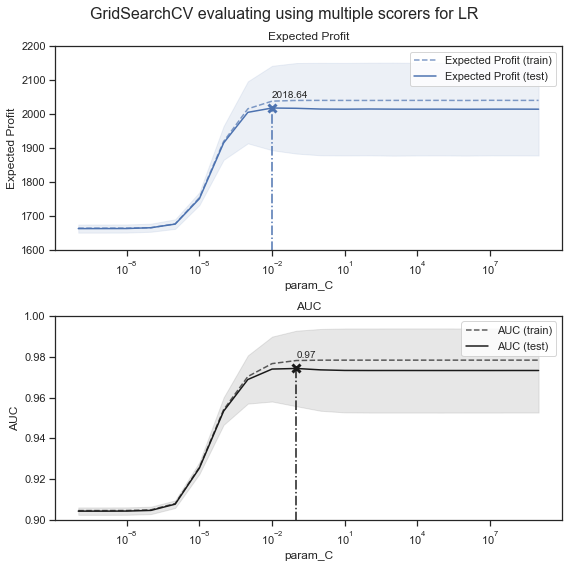

In [87]:
def grid_search_performance(results, param_col, ylim_0, ylim_1, xscale='linear', classifier=''):
    fig, axes = plt.subplots(len(double_scoring.keys()), 1, figsize=(8, 8), tight_layout=True)

    # results = lr_grid_search.cv_results_
    X_axis = np.array(results[param_col].data, dtype=float)
    idx = 0

    axes[0].set_ylim(ylim_0)
    axes[1].set_ylim(ylim_1)

    for scorer, color in zip(double_scoring.keys(), ['b', 'k']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]
            axes[idx].fill_between(
                X_axis, sample_score_mean - sample_score_std,
                sample_score_mean + sample_score_std,
                alpha=0.1 if sample == 'test' else 0, color=color,
            )
            axes[idx].plot(
                X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample),
            )

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        axes[idx].plot(
            [X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8,
        )

        # Annotate the best score for that scorer
        ylim_list = list(axes[idx].get_ylim())
        move_scale = (ylim_list[1] - ylim_list[0]) / 20
        axes[idx].annotate(
            "%0.2f" % best_score, 
            (X_axis[best_index], best_score + move_scale),
        )

        axes[idx].set_title(scorer)
        axes[idx].set_xlabel(param_col)
        axes[idx].set_ylabel(scorer)
        axes[idx].legend(loc="best")
        axes[idx].grid(False)
        axes[idx].set_xscale(xscale)

        idx += 1

    
    classifier_str = ' for ' + classifier if classifier != '' else ''
    fig.suptitle(
        'GridSearchCV evaluating using multiple scorers' + classifier_str, 
        fontsize=16,
    )
    

grid_search_performance(
    lr_grid_search.cv_results_, 'param_C', 
    ylim_0=(1600, 2200),
    ylim_1=(0.9),
    xscale='log',
    classifier='LR',
)

In [88]:
lr_grid_search.best_params_, lr_grid_search.best_score_

({'C': 0.01}, 2018.6362691863046)

In [89]:
from sklearn.metrics import classification_report

preds = lr_grid_search.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8384
           1       0.50      0.74      0.60       845

    accuracy                           0.91      9229
   macro avg       0.74      0.83      0.77      9229
weighted avg       0.93      0.91      0.92      9229



ROC for the test dataset 91.1%


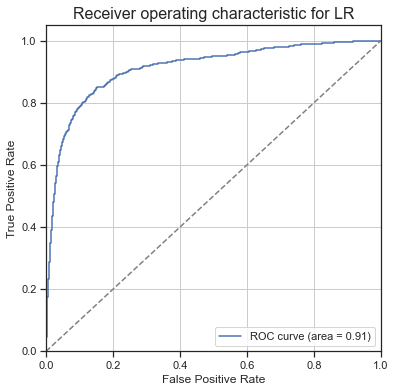

In [90]:
from sklearn import metrics

def plot_auc(model, classifier=''):
    preds_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, preds_probs)
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

    fig, ax = plt.subplots(figsize=(6, 6))

    ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    # ax.fill_between(fpr, tpr, alpha=0.4)
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 1.05)
    ax.grid()
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    classifier_str = ' for ' + classifier if classifier != '' else ''
    ax.set_title(
        'Receiver operating characteristic' + classifier_str,
        fontsize=16,
    )
    ax.legend(loc="lower right")
    
plot_auc(lr_grid_search, 'LR')

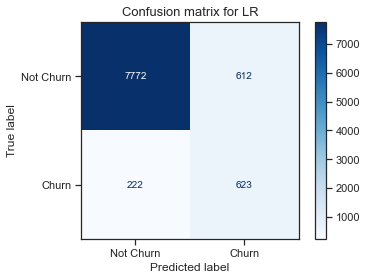

In [92]:
from sklearn.metrics import plot_confusion_matrix

def plot_cm(model, classifier=''):
    disp = plot_confusion_matrix(
        model, X_test, y_test,
        display_labels=['Not Churn', 'Churn'],
        cmap='Blues',
    )
    classifier_str = ' for ' + classifier if classifier != '' else ''
    disp.ax_.set_title(
        'Confusion matrix' + classifier_str,
        fontsize=13,
    )
    
plot_cm(lr_grid_search, 'LR')

https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py   画一个不同 threshold 下的 profit 的图

In [123]:
profit_score(y_test, preds)

196.79954707985695

## Random Forest

https://www.cnblogs.com/pinard/p/6160412.html

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf_params1 = {
    'n_estimators': range(10, 101, 10),
}

In [96]:
%%time
rf_grid_search1 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=rdn_seed), 
    param_grid=rf_params1, 
    scoring=double_scoring,
    refit='Expected Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1,
    verbose=1,
)
rf_grid_search1.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished


Wall time: 2min 9s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': range(10, 101, 10)},
             refit='Expected Profit', return_train_score=True,
             scoring={'AUC': 'roc_auc',
                      'Expected Profit': make_scorer(profit_score)},
             verbose=1)

In [97]:
# rf_grid_search1.cv_results_

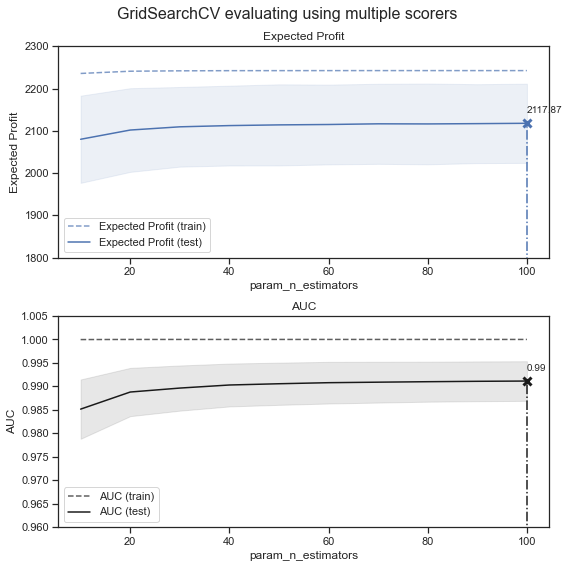

In [98]:
grid_search_performance(
    rf_grid_search1.cv_results_, 'param_n_estimators',
    ylim_0=(1800, 2300),
    ylim_1=(0.96, 1.005),
)

In [99]:
rf_best_params1 = rf_grid_search1.best_params_
rf_grid_search1.best_params_, rf_grid_search1.best_score_

({'n_estimators': 100}, 2117.8709637409847)

In [100]:
rf_params2 = {
    'max_depth': range(10,61,10),
}

In [101]:
%%time
rf_grid_search2 = GridSearchCV(
    estimator=RandomForestClassifier(**rf_best_params1, random_state=rdn_seed), 
    param_grid=rf_params2, 
    scoring=double_scoring,
    refit='Expected Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1,)
rf_grid_search2.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.5min finished


Wall time: 2min 2s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 61, 10)},
             refit='Expected Profit', return_train_score=True,
             scoring={'AUC': 'roc_auc',
                      'Expected Profit': make_scorer(profit_score)},
             verbose=1)

In [102]:
# rf_grid_search2.cv_results_

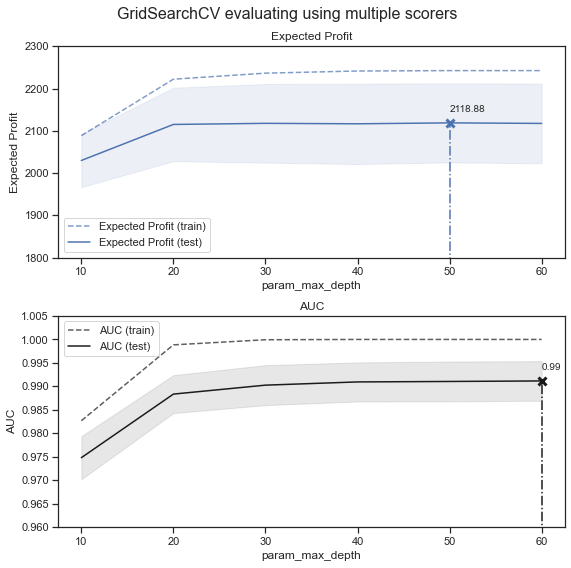

In [103]:
grid_search_performance(rf_grid_search2.cv_results_, 'param_max_depth',
                        ylim_0=(1800, 2300),
                        ylim_1=(0.96, 1.005))

In [104]:
rf_best_params2 = rf_grid_search2.best_params_
rf_grid_search2.best_params_, rf_grid_search2.best_score_

({'max_depth': 50}, 2118.8812169603393)

In [105]:
rf_params3 = {
    'max_features': range(1, 20, 2),
}

In [106]:
%%time
rf_grid_search3 = GridSearchCV(
    estimator=RandomForestClassifier(
        **rf_best_params1, 
        **rf_best_params2, 
        random_state=rdn_seed,
    ),
    param_grid=rf_params3, 
    scoring=double_scoring,
    refit='Expected Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1,
)
rf_grid_search3.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.2min finished


Wall time: 3min 25s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=50, random_state=42),
             n_jobs=-1, param_grid={'max_features': range(1, 20, 2)},
             refit='Expected Profit', return_train_score=True,
             scoring={'AUC': 'roc_auc',
                      'Expected Profit': make_scorer(profit_score)},
             verbose=1)

In [107]:
# rf_grid_search3.cv_results_

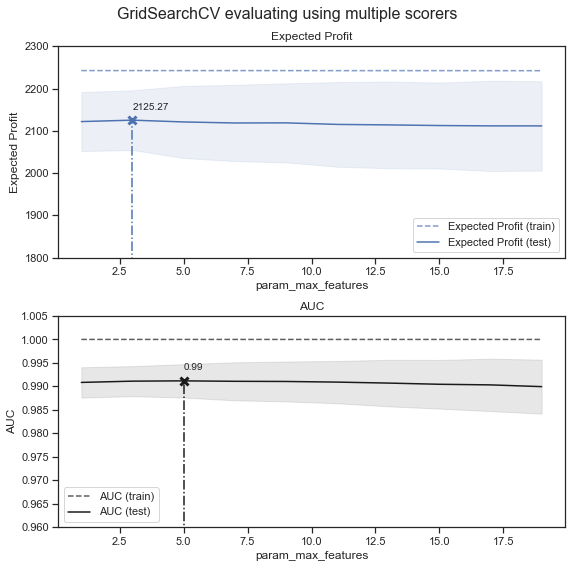

In [108]:
grid_search_performance(rf_grid_search3.cv_results_, 'param_max_features',
                        ylim_0=(1800, 2300),
                        ylim_1=(0.96, 1.005))

In [109]:
rf_best_params3 = rf_grid_search3.best_params_
rf_grid_search3.best_params_, rf_grid_search3.best_score_

({'max_features': 3}, 2125.274941530405)

In [110]:
rf_final = RandomForestClassifier(
    **rf_best_params1, 
    **rf_best_params2, 
    **rf_best_params3, 
    random_state=rdn_seed,
)
rf_final.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=50, max_features=3, random_state=42)

In [111]:
rf_final = RandomForestClassifier(**rf_best_params1, **rf_best_params2, **rf_best_params3, random_state=rdn_seed)
rf_final.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=50, max_features=3, random_state=42)

In [119]:
from sklearn.metrics import classification_report

preds = rf_final.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8384
           1       0.62      0.70      0.66       845

    accuracy                           0.93      9229
   macro avg       0.79      0.83      0.81      9229
weighted avg       0.94      0.93      0.93      9229



ROC for the test dataset 93.6%


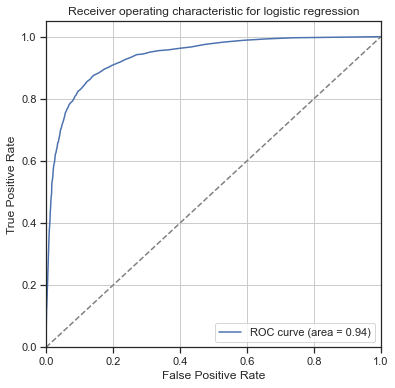

In [113]:
preds_probs = rf_final.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# ax.fill_between(fpr, tpr, alpha=0.4)
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.05)
ax.grid()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic for logistic regression')
ax.legend(loc="lower right")

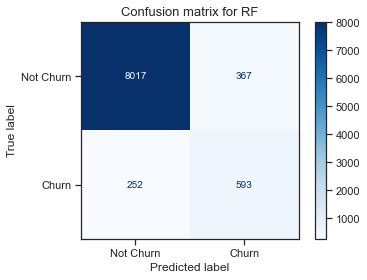

In [114]:
plot_cm(rf_final, 'RF')

In [120]:
profit_score(y_test, preds)

225.96980171199476

In [153]:
importances = rf_final.feature_importances_
col_names =  X_train_res.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,value,colName
0,0.030569,loc_ic_t2t_mou_8
1,0.030280,onnet_mou_8
2,0.027988,offnet_mou_8
3,0.025903,max_rech_amt_8
4,0.025214,roam_og_mou_8
5,0.025159,arpu_8
6,0.023274,roam_ic_mou_8
7,0.023237,loc_ic_t2m_mou_8over7
8,0.022997,arpu_8over7
9,0.022545,last_day_rech_amt_8


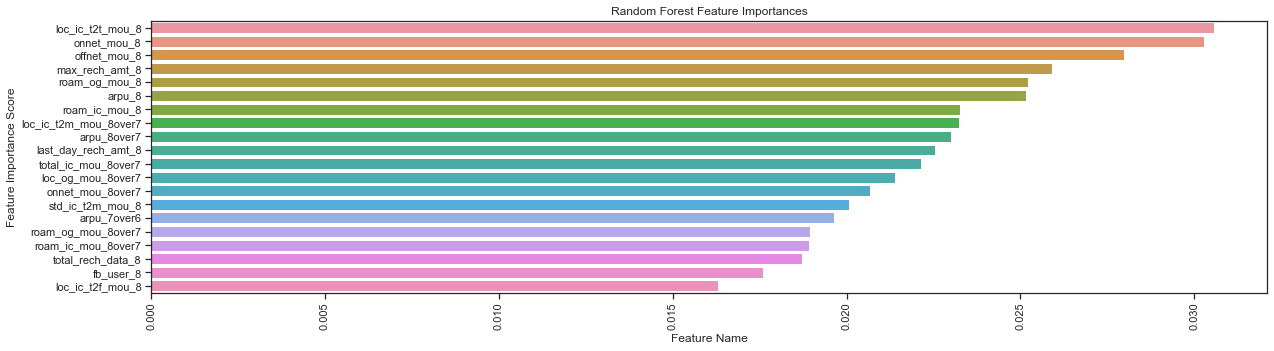

In [154]:
plt.figure(figsize = (20,5))
sns.barplot(y='colName', x='value',data=sorted_feature_importance[0:20])
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')
plt.xticks(rotation = 90)
plt.title('Random Forest Feature Importances')
plt.show()

## SVM

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
svm_params1 = {
    'C': list(np.power(10.0, np.arange(-1, 3))),
}

In [133]:
%%time
svm_grid_search1 = GridSearchCV(
    SVC(kernel='rbf', random_state=rdn_seed),
    param_grid=svm_params1, 
    scoring=double_scoring,
    refit='Expected Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1
)
svm_grid_search1.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 68.0min remaining: 13.6min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 71.0min finished


Wall time: 1h 51min 26s


GridSearchCV(cv=4, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1.0, 10.0, 100.0]}, refit='Profit',
             return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Profit': make_scorer(profit_score)},
             verbose=1)

In [134]:
# svm_grid_search1.cv_results_

{'mean_fit_time': array([1213.83586919, 2093.2570017 , 2256.85979563]),
 'std_fit_time': array([184.36358408, 542.59473824, 582.97438743]),
 'mean_score_time': array([58.86697119, 43.05195081, 29.28262407]),
 'std_score_time': array([7.65508584, 9.08347674, 4.75127234]),
 'param_C': masked_array(data=[1.0, 10.0, 100.0],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1.0}, {'C': 10.0}, {'C': 100.0}],
 'split0_test_Profit': array([1372.91183216, 1369.59210156, 1343.30137919]),
 'split1_test_Profit': array([1611.90316009, 1628.0543414 , 1627.89891525]),
 'split2_test_Profit': array([1606.15511832, 1622.87301901, 1626.46652679]),
 'split3_test_Profit': array([1607.38612028, 1625.83860166, 1628.87878643]),
 'mean_test_Profit': array([1549.58905771, 1561.58951591, 1556.63640191]),
 'std_test_Profit': array([102.02709081, 110.86500002, 123.17202015]),
 'rank_test_Profit': array([3, 1, 2]),
 'split0_train_Profit': array([1627.636

In [ ]:
grid_search_performance(
    svm_grid_search1.cv_results_, 'param_C',
    xscale='log',
    ylim_0=(1300, 1700),
    ylim_1=(0.96, 1.005),
)

In [135]:
svm_best_params1 = svm_grid_search1.best_params_
svm_grid_search1.best_params_, svm_grid_search1.best_score_

({'C': 10.0}, 1561.5895159080444)

In [102]:
svm_params2 = {
    'gamma': list(np.power(10.0, np.arange(-4, 1))),
}

In [103]:
%%time
svm_grid_search2 = GridSearchCV(
    SVC(**svm_best_params1, kernel='rbf', random_state=rdn_seed),
    param_grid=svm_params2, 
    scoring=double_scoring,
    refit='Expected Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1
)
svm_grid_search2.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  5.9min remaining: 17.8min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  6.9min finished


Wall time: 9min 14s


GridSearchCV(cv=4, estimator=SVC(C=10), n_jobs=-1,
             param_grid={'gamma': [0.0001, 0.001]}, refit='Profit',
             return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Profit': make_scorer(profit_score)},
             verbose=1)

In [101]:
svm_grid_search2.cv_results_

{'mean_fit_time': array([ 391.42407203, 1585.89135545, 2942.58952451]),
 'std_fit_time': array([117.24238063,  60.51768555,  49.91204181]),
 'mean_score_time': array([ 47.49775672, 233.62815559, 196.39125609]),
 'std_score_time': array([10.08181926,  3.0807548 ,  4.72326773]),
 'param_gamma': masked_array(data=[0.01, 0.1, 1.0],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.01}, {'gamma': 0.1}, {'gamma': 1.0}],
 'split0_test_Profit': array([1362.33091668, 1328.97795566,  803.94051496]),
 'split1_test_Profit': array([1628.57655382, 1569.14427822,  969.86615806]),
 'split2_test_Profit': array([1624.53299756, 1564.15218096,  968.53132741]),
 'split3_test_Profit': array([1625.67074209, 1575.08813972,  952.92008226]),
 'mean_test_Profit': array([1560.27780254, 1509.34063864,  923.81452067]),
 'std_test_Profit': array([114.29419898, 104.20438065,  69.52923319]),
 'rank_test_Profit': array([1, 2, 3]),
 'split0_train_Profit

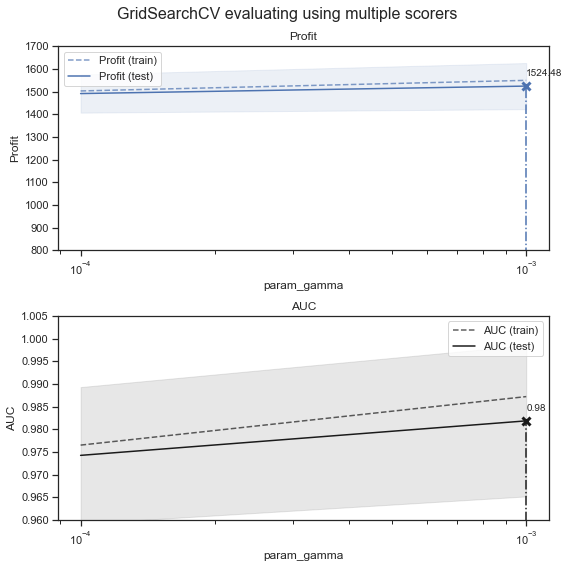

In [104]:
grid_search_performance(
    svm_grid_search2.cv_results_, 'param_gamma',
    xscale='log',
    ylim_0=(800, 1700),
    ylim_1=(0.96, 1.005),
)

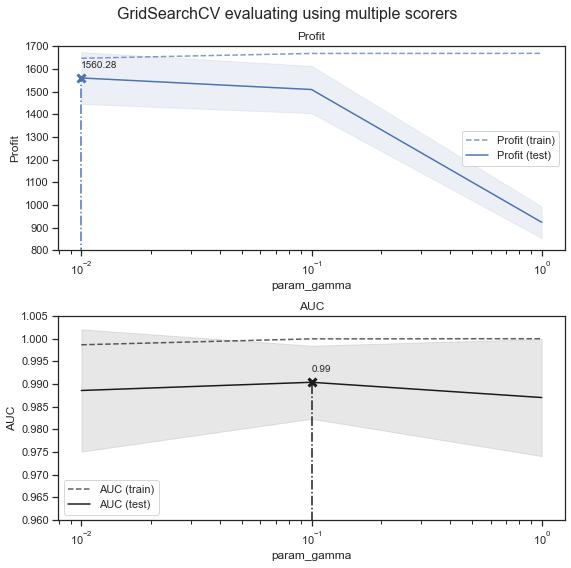

In [100]:
grid_search_performance(
    svm_grid_search2.cv_results_, 'param_gamma',
    xscale='log',
    ylim_0=(800, 1700),
    ylim_1=(0.96, 1.005),
)

In [ ]:
svm_best_params2 = svm_grid_search2.best_params_
svm_grid_search2.best_params_, svm_grid_search2.best_score_

In [ ]:
%%time
from sklearn.svm import SVC
svm_rbf = SVC(**svm_best_params1, kernel='rbf', probability=True)
svm_rbf.fit(X_train_res, y_train_res)

In [116]:
%%time
from sklearn.svm import SVC
svm_rbf = SVC(**svm_best_params1, **svm_best_params2, kernel='rbf', probability=True, random_state=rdn_seed)
svm_rbf.fit(X_train_res, y_train_res)

Wall time: 38min 40s


SVC(C=10, gamma=0.01, probability=True)

In [121]:
from sklearn.metrics import classification_report

preds = svm_rbf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8384
           1       0.62      0.66      0.64       845

    accuracy                           0.93      9229
   macro avg       0.80      0.81      0.80      9229
weighted avg       0.93      0.93      0.93      9229



ROC for the test dataset 91.9%


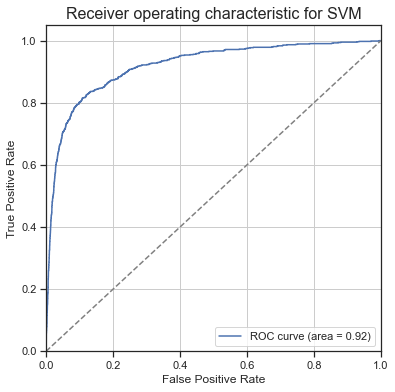

In [122]:
plot_auc(svm_rbf, 'SVM')

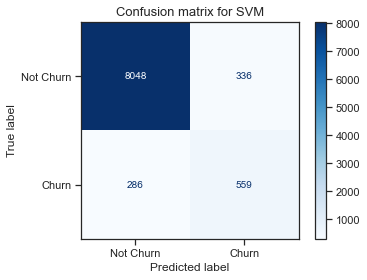

In [123]:
plot_cm(svm_rbf, 'SVM')

In [124]:
profit_score(y_test, preds)

214.70183118431027

## Random Forest

https://www.cnblogs.com/pinard/p/6160412.html

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf_params1 = {
    'n_estimators': range(10, 101, 10),
}

In [96]:
%%time
rf_grid_search1 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=rdn_seed), 
    param_grid=rf_params1, 
    scoring=double_scoring,
    refit='Expected Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1,
    verbose=1,
)
rf_grid_search1.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished


Wall time: 2min 9s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': range(10, 101, 10)},
             refit='Expected Profit', return_train_score=True,
             scoring={'AUC': 'roc_auc',
                      'Expected Profit': make_scorer(profit_score)},
             verbose=1)

In [97]:
# rf_grid_search1.cv_results_

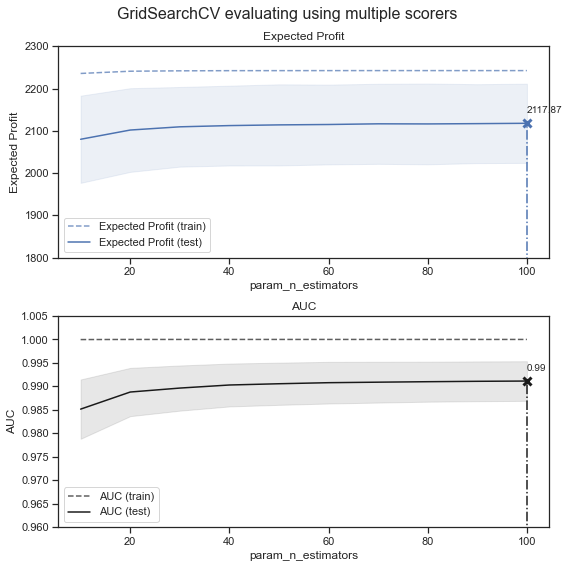

In [98]:
grid_search_performance(
    rf_grid_search1.cv_results_, 'param_n_estimators',
    ylim_0=(1800, 2300),
    ylim_1=(0.96, 1.005),
)

In [99]:
rf_best_params1 = rf_grid_search1.best_params_
rf_grid_search1.best_params_, rf_grid_search1.best_score_

({'n_estimators': 100}, 2117.8709637409847)

In [100]:
rf_params2 = {
    'max_depth': range(10,61,10),
}

In [101]:
%%time
rf_grid_search2 = GridSearchCV(
    estimator=RandomForestClassifier(**rf_best_params1, random_state=rdn_seed), 
    param_grid=rf_params2, 
    scoring=double_scoring,
    refit='Expected Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1,)
rf_grid_search2.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.5min finished


Wall time: 2min 2s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 61, 10)},
             refit='Expected Profit', return_train_score=True,
             scoring={'AUC': 'roc_auc',
                      'Expected Profit': make_scorer(profit_score)},
             verbose=1)

In [102]:
# rf_grid_search2.cv_results_

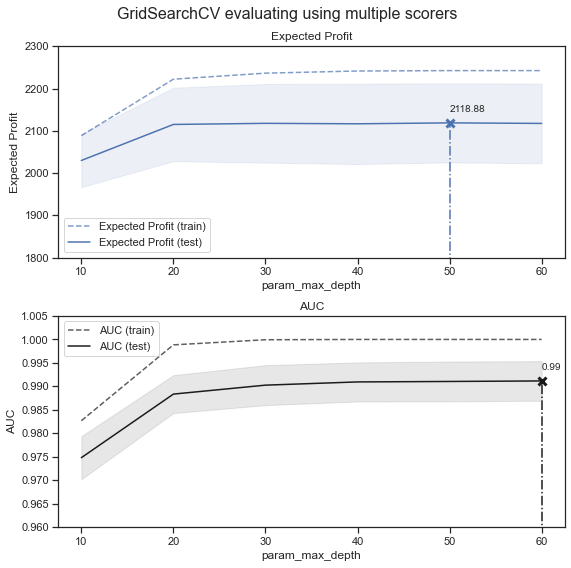

In [103]:
grid_search_performance(rf_grid_search2.cv_results_, 'param_max_depth',
                        ylim_0=(1800, 2300),
                        ylim_1=(0.96, 1.005))

In [104]:
rf_best_params2 = rf_grid_search2.best_params_
rf_grid_search2.best_params_, rf_grid_search2.best_score_

({'max_depth': 50}, 2118.8812169603393)

In [105]:
rf_params3 = {
    'max_features': range(1, 20, 2),
}

In [106]:
%%time
rf_grid_search3 = GridSearchCV(
    estimator=RandomForestClassifier(
        **rf_best_params1, 
        **rf_best_params2, 
        random_state=rdn_seed,
    ),
    param_grid=rf_params3, 
    scoring=double_scoring,
    refit='Expected Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1,
)
rf_grid_search3.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.2min finished


Wall time: 3min 25s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=50, random_state=42),
             n_jobs=-1, param_grid={'max_features': range(1, 20, 2)},
             refit='Expected Profit', return_train_score=True,
             scoring={'AUC': 'roc_auc',
                      'Expected Profit': make_scorer(profit_score)},
             verbose=1)

In [107]:
# rf_grid_search3.cv_results_

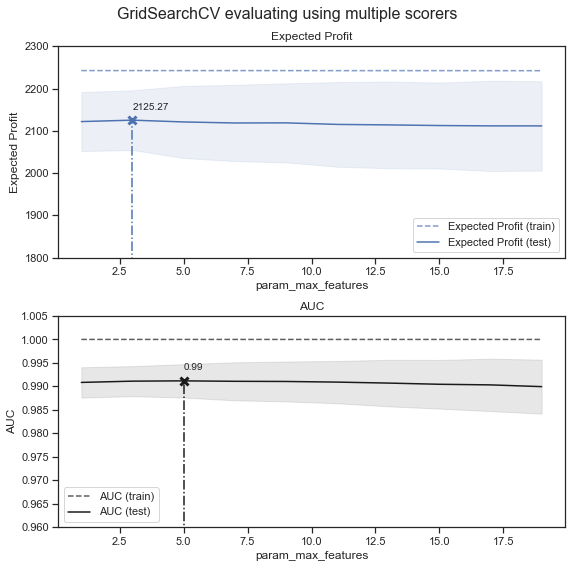

In [108]:
grid_search_performance(rf_grid_search3.cv_results_, 'param_max_features',
                        ylim_0=(1800, 2300),
                        ylim_1=(0.96, 1.005))

In [109]:
rf_best_params3 = rf_grid_search3.best_params_
rf_grid_search3.best_params_, rf_grid_search3.best_score_

({'max_features': 3}, 2125.274941530405)

In [110]:
rf_final = RandomForestClassifier(
    **rf_best_params1, 
    **rf_best_params2, 
    **rf_best_params3, 
    random_state=rdn_seed,
)
rf_final.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=50, max_features=3, random_state=42)

In [111]:
rf_final = RandomForestClassifier(**rf_best_params1, **rf_best_params2, **rf_best_params3, random_state=rdn_seed)
rf_final.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=50, max_features=3, random_state=42)

In [119]:
from sklearn.metrics import classification_report

preds = rf_final.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8384
           1       0.62      0.70      0.66       845

    accuracy                           0.93      9229
   macro avg       0.79      0.83      0.81      9229
weighted avg       0.94      0.93      0.93      9229



ROC for the test dataset 93.6%


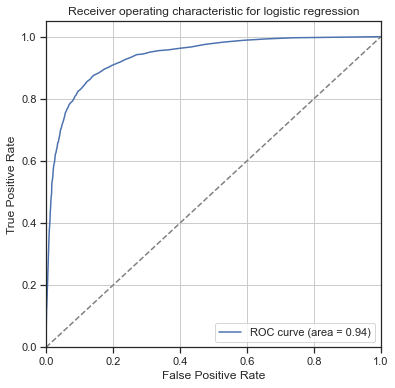

In [113]:
preds_probs = rf_final.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# ax.fill_between(fpr, tpr, alpha=0.4)
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.05)
ax.grid()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic for logistic regression')
ax.legend(loc="lower right")

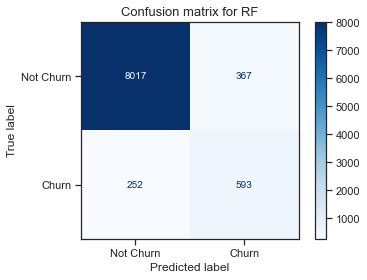

In [114]:
plot_cm(rf_final, 'RF')

In [120]:
profit_score(y_test, preds)

225.96980171199476

In [153]:
importances = rf_final.feature_importances_
col_names =  X_train_res.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,value,colName
0,0.030569,loc_ic_t2t_mou_8
1,0.030280,onnet_mou_8
2,0.027988,offnet_mou_8
3,0.025903,max_rech_amt_8
4,0.025214,roam_og_mou_8
5,0.025159,arpu_8
6,0.023274,roam_ic_mou_8
7,0.023237,loc_ic_t2m_mou_8over7
8,0.022997,arpu_8over7
9,0.022545,last_day_rech_amt_8


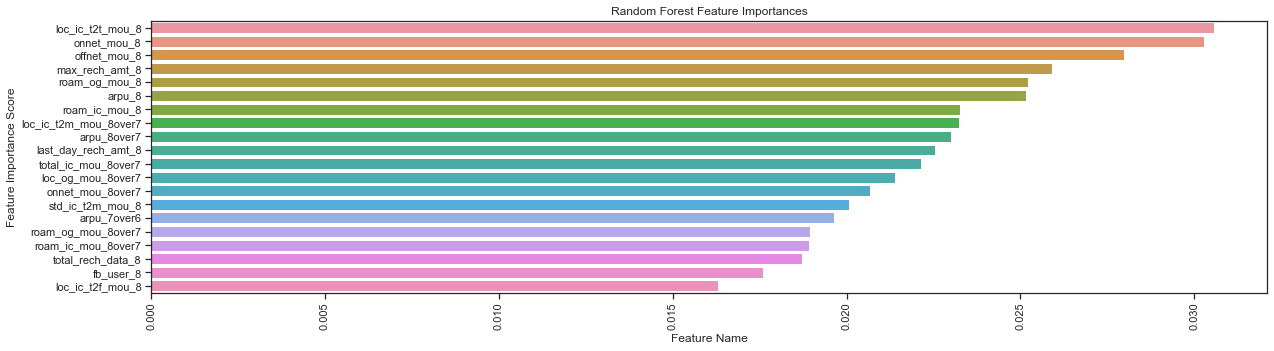

In [154]:
plt.figure(figsize = (20,5))
sns.barplot(y='colName', x='value',data=sorted_feature_importance[0:20])
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')
plt.xticks(rotation = 90)
plt.title('Random Forest Feature Importances')
plt.show()